# : Import libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#2: Load dataset

In [42]:
df = pd.read_csv("AAPL.csv")
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['Unnamed: 0', 'symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor']


#  3: Select relevant features

In [43]:
df = df[['open', 'high', 'low', 'close', 'volume']].dropna()
df.head()

,open,high,low,close,volume
0,130.34,132.260,130.05,132.045,45833246
1,131.86,131.950,131.10,131.780,30733309
2,131.23,131.450,129.90,130.280,50884452
3,131.20,131.390,130.05,130.535,32112797
4,129.86,130.655,129.32,129.960,33667627


#  4: Normalize data


In [44]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

X = scaled_data[:, [0, 1, 2, 4]]
y = scaled_data[:, 3]

#  5: Train-test split


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# 6: Train model


In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#  7: Predictions


In [47]:
y_pred = model.predict(X_test)


#  8: Evaluation


In [48]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

Training samples: 1006
Testing samples: 252
MSE: 9.430849356072505e-05
RMSE: 0.00971125602384805
R²: 0.9971760771363247


#  9: Visualization


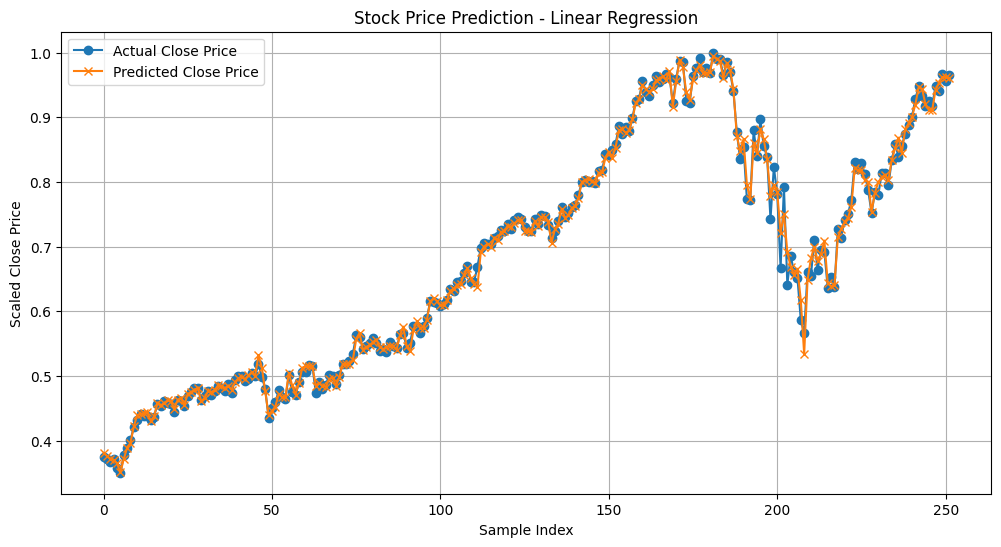

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test, label="Actual Close Price", marker='o')
plt.plot(y_pred, label="Predicted Close Price", marker='x')
plt.title("Stock Price Prediction - Linear Regression")
plt.xlabel("Sample Index")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.grid(True)
plt.show()